In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

```Simple Linear Regression Using Gradient Descent```
#the relationship between student test scores and hours of study
#Intuitively, there must be a relationship right? The more you study, the better your test scores 

In [ ]:
#data = pd.read_excel('flightcosts.xlsx') 


In [ ]:
data = np.genfromtxt("../linear_regression_live-master/data.csv", delimiter=",")

In [ ]:
data.shape

In [ ]:
data[0:10] #select the first nine rows


In [ ]:
#split dataset into training set(20 percent) and test set (80 percent)
#
x_train = data[0:20,0]
x_test  = data[20:100,0]
y_train = data[0:20,1]
y_test  = data[20:100,1]


In [ ]:
[x_train.shape,x_test.shape]

In [ ]:
x_train[0:10]

In [ ]:
#arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

In [ ]:
y_train[0:10]

In [35]:
#linear hypothesis where m is slope,b is intercept and x is independent variable
def hypothesis(m,b,x):
    y = m*x + b
    return y


In [47]:
#picking a random model value m = 2.83, b = 1.4
z = hypothesis(2.83,1.4,x_train)

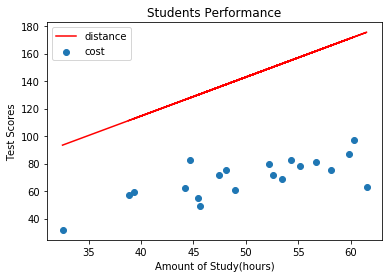

In [48]:
makeplot(x_train,y_train,z)

In [45]:

def makeplot(x,y,z):
    plt.scatter(x,y)
    plt.plot(x,z, color='r')
    plt.legend(['distance', 'cost'])
    plt.title('Students Performance')
    plt.xlabel('Amount of Study(hours)')
    plt.ylabel('Test Scores')
    plt.show()

In [ ]:
data_train = data[0:20]
data_train

In [ ]:
#Compute Cost or Mean Squared Error 
# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

In [ ]:
#hypothesis 

In [ ]:

#to calculate gradient descent of a given line

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

In [ ]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate)
    return [b, m]

In [40]:
#main method<>

learning_rate = 0.0001
initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 1000
print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, data_train)))
print("Running...")
[b, m] = gradient_descent_runner(data_train, initial_b, initial_m, learning_rate, num_iterations)
print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, data_train)))

Starting gradient descent at b = 0, m = 0, error = 5038.357337600917
Running...
After 1000 iterations b = 0.01983309670475249, m = 1.390043942673587, error = 98.63719087297376


In [41]:
z = hypothesis(1.390043942673587,0.01983309670475249,x_train)

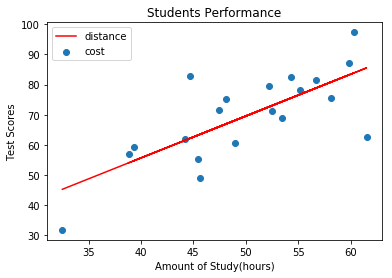

In [43]:
plt.scatter(x_train,y_train)
plt.plot(x_train,z, color='r')
plt.legend(['distance', 'cost'])
plt.title('Students Performance')
plt.xlabel('Amount of Study(hours)')
plt.ylabel('Test Scores')
plt.show()
